<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #7: Ranking

<span style="color:blue; font-size: 12pt">Anastasia Zukhba </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:

[1] C.J.C. Burges, T. Shaked, E. Renshaw, A. Lazier, M. Deeds, N. Hamilton and G. Hullender. Learning to rank using gradient descent. In Proc. of ICML, pages 89-96, 2005.

[2] Y. Freund, R. Iyer, R. Schapire, and Y. Singer. An efficient boosting algorithm for combining preferences. The Journal of Machine Learning Research, 4: 933-969, 2003.

[3] J. Xu and H. Li. AdaRank: a boosting algorithm for information retrieval. In Proc. of SIGIR, pages 391-398, 2007.

[4] D. Metzler and W.B. Croft. Linear feature-based models for information retrieval. Information Retrieval, 10(3): 257-274, 2007.

[5] Q. Wu, C.J.C. Burges, K. Svore and J. Gao. Adapting Boosting for Information Retrieval Measures. Journal of Information Retrieval, 2007.

[6] J.H. Friedman. Greedy function approximation: A gradient boosting machine. Technical Report, IMS Reitz Lecture, Stanford, 1999; see also Annals of Statistics, 2001.

[7] Z. Cao, T. Qin, T.Y. Liu, M. Tsai and H. Li. Learning to Rank: From Pairwise Approach to Listwise Approach. ICML 2007. 

[8] L. Breiman. Random Forests. Machine Learning 45 (1): 5–32, 2001.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было.

<h1 align="center">Check Questions (10%)</h1> 

**1.** Что является объектом в задаче обучения ранжированию? Какой смысл имеют целевые метки? Какие объекты сравнимы между собой?

Пары <Запрос, Документ>. Целевые метки - оценки релевантности документов из одного запроса. Между собой сравнимы только документы из одного запроса.

**2.** В чём преимущество метрики NDCG перед метрикой MAP?

MAP, определен для $Y \in \{0,1\}$. Для NDCG целевая метка может быть не только 0,1 (релевантный, не релевантный), но также мера релевантоности может быть проградуированна. (1,2,3...).

**3.** Почему говорят, что все основные метрики качества дискретны?

Для задачи ранжирования нас интересует порядок элементов, идеальную функцию потерь которую мы хотим минимизировать можно записать как $L = \sum_{i < j} [a(i) - a(j) > 0]$ (количество инверсий). И хотя функция ранжирования $a()$ может быть непрерывной, $L$ принимает конечное число значений и не является дифференциируемой по $a$.

**4.** В чем преимущество факторизации в модели RankNet?

Позволяет удобно вычислять градиент при преходе к $\lambda$ метрике.

**5.** Как решается проблема дискретности метрик в моделях LambdaRank и LambdaMART?

Изменение дискретной функции при перестановке пары (i,j) (например $\Delta NDCG_{ij}$)  умножается на непрерывную от $|x_i - x_j|$ в 0 функцию (например $(x_i - x_j)$).

**6.** Какое преобразование данных используется в модели RankSVM?

Переход к попарному ранжированию.

**7.** Как изменится верхняя оценка на скорость сходимости в модели PageRank, если считать, что при операции телепортации пользователь всегда выбирает страницу, отличную от текущей?

$\min{p_{ij}} = p_{00} = 0$, верхняя оценка запишется как $\left|\left|\Pi^{(n)} - \Pi\right|\right| \leq (1 - p_{00})^{n} \leq 1$. Т.е. верхняя оценка вообще не гарантирует сходимость.

**8.** Имеет ли смысл выполнять итерации в методе power iteration для разных начальных распределений $\Pi^{(0)}$ с точки зрения теории? А с точки зрения практического применения, не обязательно при этом доводя до сходимости?

С точки зрения теории - нет, т.к. сходимость достигается вне зависимости от начального распределения.
С точки зрения практики - наверное тоже нет, т.к. верхняя оценка на скорость сходимости экспоненциальная,т.е. скорость сходимости увеличивается экспоненциально с числом итераций. Лучше выбрать начальное распределение как равномерное распределение (или распределение соответствующее представлению о предельном распределении) и запустить один раз до сходимости.

<h1 align="center"> Theoretical tasks (10%)</h1>

**1.** Предположим, что известные вероятностности в модели RankNet задаются по правилу
$$Q_{ij} = \mathsf{Q}(X_i \triangleright X_j) = \frac{1}{1 + e^{-\sigma (Y_i - Y_j)}}.$$
Можно ли провести факторизацию в данной модели?

Да, можно. Это стандартная формула вероятностей для RankNet. Подробный вывод можно найти здесь: https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/MSR-TR-2010-82.pdf

**2.** Покажите, что вес PageRank каждой страницы не меньше $\frac{p}{|V|}$.

$p(v|a_i) \geq \frac{p}{N} \implies rk_j(v) = \sum_{i} p(v|a_i) \cdot rk_{j-1}(a_i) \geq \sum_{i} \frac{p}{N} \cdot rk_{j-1}(a_i) = \frac{p}{N} \sum_{i}\cdot rk_{j-1}(a_i) = \frac{p}{N}$

**3.** Пользователь браузера в дополнение к кликам по ссылкам один раз может перейти по кнопке *Назад* и вернуться на предыдущую страницу. Можно ли такую модель описать с помощью однородной марковской цепи? Если да, опишите, если нет, докажите.

Да, можно.
 
Введем новые состояния цепи (вершины), $\{s_k\} = \{(v_k, b_k) | v_k \in V, b_k \in \{0,1\}\}$, таким образом,
$v_k$ - вершины исходного графа, $b_k$ - индикатор того, что в данную вершину пришли путем нажатия ссылки "Назад".
 
$p(s_i|s_{i-1},s_{i-2},s_{i-3}, \dots) = p(s_i|s_{i-1},s_{i-2})$ - вероятность перехода в состояние на шаге $i$ зависит только от текущей вершины и вершины на предыдущем шаге, а также индикатора перехода по ссылке "Назад" для $i-1$ - го сотояния. 

Данный закон переходных вероятностей определяет однородную марковскую цепь порядка 2 (или меньше).

<h1 align="center"> Practical tasks (80%)</h1>
# Part 1 (15%)

In [2]:
import numpy as np
from scipy.stats import bernoulli
import networkx
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.parse import urlparse, urlunparse
from time import sleep
from itertools import product
import matplotlib.pyplot as plt
import lxml

%matplotlib inline

## Вычисление весов PageRank power-методом.

Реализовать удобнее с помощью функции np.nan_to_num, которая в данном numpy.array заменит все вхождения nan на ноль. Это позволяет удобно производить поэлементное деление одного вектора на другой в случае, если во втором векторе есть нули.

**Внимание!** Эти функции будут проверяться автоматическими тестами.

In [3]:
def create_page_rank_markov_chain(links, damping_factor=0.15):
    ''' По веб-графу со списком ребер links строит матрицу 
    переходных вероятностей соответствующей марковской цепи.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        damping_factor --- вероятность перехода не по ссылке (float);
        
        Возвращает prob_matrix --- numpy.matrix, shape=(|V|, |V|).
    '''
    
    links = np.array(links)
    
    # Мне кажется, это не самый лучший способ выбирать N, так как 
    # у сильно разреженных графов будут изолированные вершины, которые 
    # с таким подходом мы просто не учтём
    # Для веб-страниц это, конечно, работает без проблем
    
    N = links.max() + 1  # Число веб-страниц
    
    set_of_links = [set() for i in range(N)]
    for link in links:
        set_of_links[link[0]].add(link[1])
    
    prob_matrix = np.zeros((N, N))
    # print (prob_matrix)
    
    for i in range(N):
        for j in range(N):
            if (len(set_of_links[i]) == N):
                prob_matrix[i][j] = 1. / float(N)
            elif (j in set_of_links[i]):
                prob_matrix[i][j] = (1. - damping_factor) / float(len(set_of_links[i]))
            elif (len(set_of_links[i]) == 0):
                prob_matrix[i][j] = 1. / float(N)
            else:
                prob_matrix[i][j] = damping_factor / float(N - len(set_of_links[i]))
    
    # print (prob_matrix)
    return np.matrix(prob_matrix)


def page_rank(links, start_distribution, damping_factor=0.15, 
              tolerance=10 ** (-7), return_trace=False):
    ''' Вычисляет веса PageRank для веб-графа со списком ребер links 
    степенным методом, начиная с начального распределения start_distribution, 
    доводя до сходимости с точностью tolerance.
    
        links --- список (list) пар вершин (tuple), 
                может быть передан в виде numpy.array, shape=(|E|, 2);
        start_distribution --- вектор размерности |V| в формате numpy.array;
        damping_factor --- вероятность перехода не по ссылке (float);
        tolerance --- точность вычисления предельного распределения;
        return_trace --- если указана, то возвращает список распределений во 
                            все моменты времени до сходимости
    
        Возвращает:
        1). если return_trace == False, то возвращает distribution --- 
        приближение предельного распределения цепи,
        которое соответствует весам PageRank.
        Имеет тип numpy.array размерности |V|.
        2). если return_trace == True, то возвращает также trace ---
        список распределений во все моменты времени до сходимости. 
        Имеет тип numpy.array размерности 
        (количество итераций) на |V|.
    '''
    
    prob_matrix = create_page_rank_markov_chain(links, 
                                                damping_factor=damping_factor)
    #print (prob_matrix)
    
    Pi_k1 = np.array(start_distribution)
    #print (Pi_k1)
    Pi_k2 = np.dot(Pi_k1, prob_matrix)
    trace = [Pi_k1, Pi_k2]
    while (np.linalg.norm(Pi_k1 - Pi_k2) > tolerance):
        Pi_k1 = Pi_k2
        Pi_k2 = np.dot(Pi_k1, prob_matrix)
        trace.append(Pi_k2)
    
    distribution = trace[-1]
    if return_trace:
        return np.array(distribution).ravel(), np.array(trace)
    else:
        return np.array(distribution).ravel()

# Проверка реализации
Напишите для начала функцию для генерации случайного ориентированного графа $G(n, p)$. Случайный граф генерируется следующий образом. Берется множество $\{0, ..., n-1\}$, которое есть множество вершин этого графа. Ребро $(i, j)$ (пара упорядочена, возможно повторение) добавляется в граф независимо от других ребер с вероятностью $p$.

In [4]:
def random_graph(n, p):
    return [(i,j) for i in range(n) for j in range(n) 
                  if (np.random.uniform(0,1) <= p and i != j)]

In [13]:
def binary_tree(n):
    return [(i, 2*i) for i in range(n)] + [(i, 2*i + 1) for i in range(n)]

In [14]:
def binary_tree2(n):
    return [(i, 2*i) for i in range(n)] + [(i, 2*i + 1) for i in range(n)] +\
           [(2*i, i) for i in range(n)] + [(2*i + 1, i) for i in range(n)]

In [5]:
g = random_graph(3, 0.5)
start_distr = [0.25, 0.25, 0.5]
g

[(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1)]

In [6]:
prob, trace = page_rank(g, start_distr, damping_factor=0.15, 
                        tolerance=10**(-3), return_trace=True)

Теперь сгенерируем случайный граф и нарисуем его.

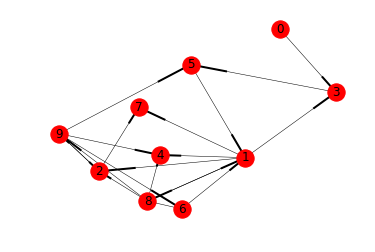

In [7]:
N, p = 10, 0.2
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

Посчитаем его PageRank и изобразим так, чтобы размер вершины был пропорционален ее весу.

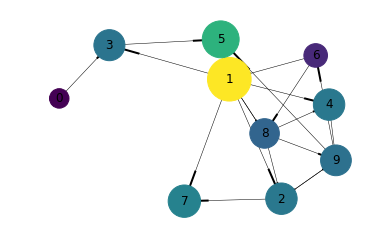

In [8]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

Как мы уже отмечали выше, эргодическая теорема дает верхнюю оценку на скорость сходимости. Давайте посмотрим, насколько она является точной. Для этого при вычислении PageRank нужно установить флаг return_trace.

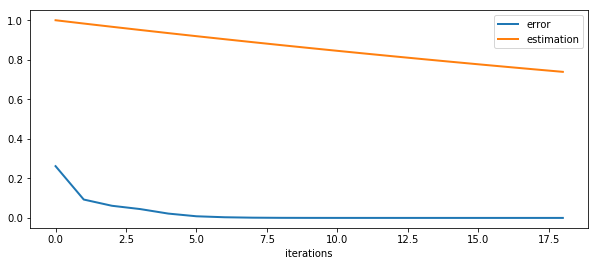

In [12]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
#print (errors)
#print (pr_trace.shape)
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
epsilon = np.min(create_page_rank_markov_chain(edges))
plt.plot(x, np.array([(1.-epsilon)**n for n in range(len(x))]), 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Видим, что наша верхняя оценка на скорость сходимости верна, а также то, что в действительности сходимость намного быстрее, чем верхняя оценка.

Проведите небольшое исследование. В ходе исследования выясните, как скорость сходимости (количество итераций до сходимости) зависит от $n$ и $p$, а так же начального распределения. Вычислите также веса PageRank для некоторых неслучайных графов. В каждом случае стройте графики. От чего зависит вес вершины?

Давайте для начала зафиксируем $p = 0.25$ и будем увеличивать $N$

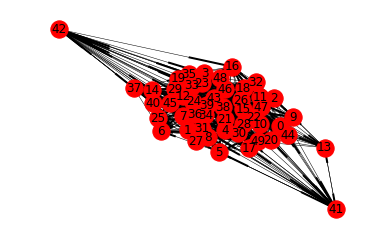

In [15]:
N, p = 50, 0.25
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

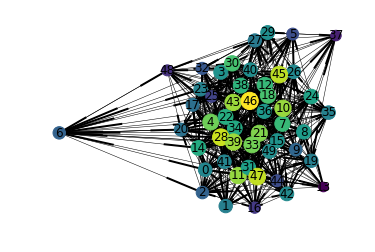

In [16]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

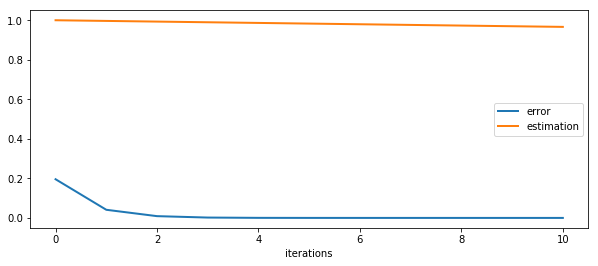

In [17]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
#print (errors)
#print (pr_trace.shape)
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
epsilon = np.min(create_page_rank_markov_chain(edges))
plt.plot(x, np.array([(1.-epsilon)**n for n in range(len(x))]), 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

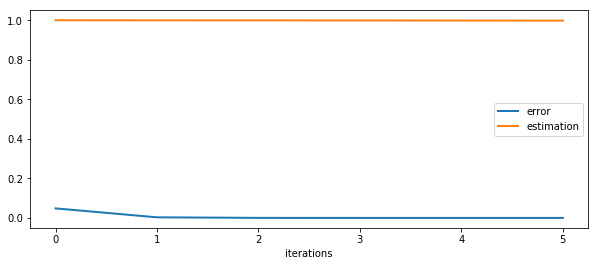

In [18]:
N, p = 500, 0.25
edges = random_graph(N, p)

start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
#print (errors)
#print (pr_trace.shape)
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
epsilon = np.min(create_page_rank_markov_chain(edges))
plt.plot(x, np.array([(1.-epsilon)**n for n in range(len(x))]), 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Видим, что при увеличении N количество итераций до сходимости уменьшается, так как структура графа упрощается при увеличении N.

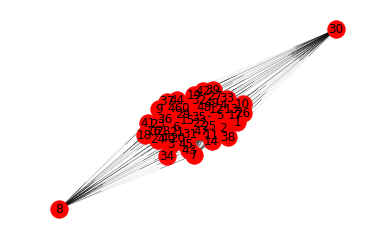

In [20]:
N, p = 50, 0.5
edges = random_graph(N, p)

G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.07)

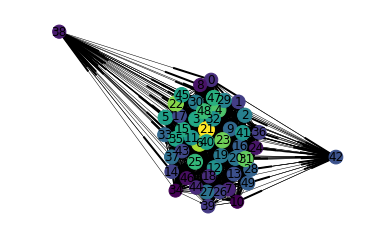

In [21]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

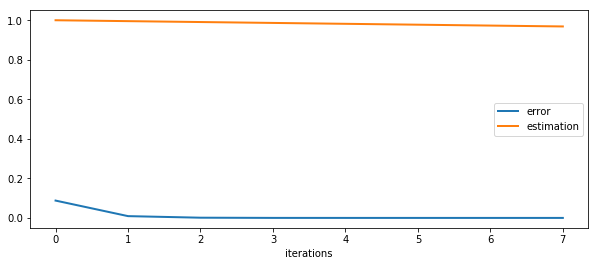

In [22]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
#print (errors)
#print (pr_trace.shape)
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
epsilon = np.min(create_page_rank_markov_chain(edges))
plt.plot(x, np.array([(1.-epsilon)**n for n in range(len(x))]), 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

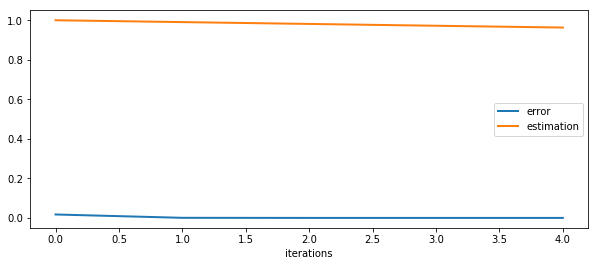

In [23]:
N, p = 50, 0.8
edges = random_graph(N, p)

start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
#print (errors)
#print (pr_trace.shape)
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
epsilon = np.min(create_page_rank_markov_chain(edges))
plt.plot(x, np.array([(1.-epsilon)**n for n in range(len(x))]), 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Аналогично и при увеличении $p$, граф становится более "полным", то есть, структура графа упрощается, веса усредняются между вершинами.

Рассмотрим теперь не совсем случайные графы, а именно двоичные деревья.

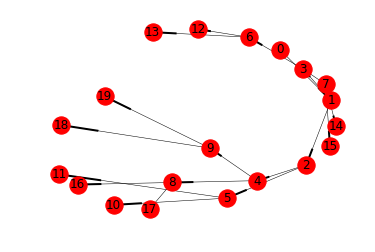

In [26]:
N, p= 10, 0.2
edges = binary_tree(N)
N = 2*N
G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

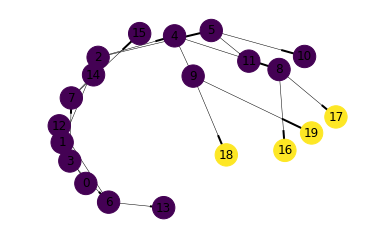

In [27]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

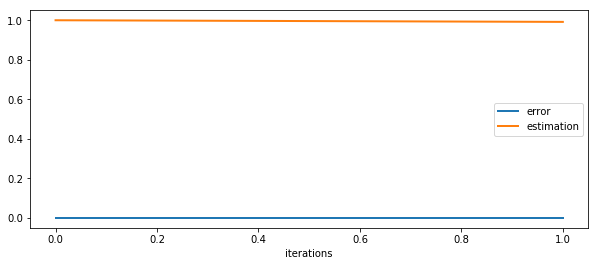

In [28]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
#print (errors)
#print (pr_trace.shape)
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
epsilon = np.min(create_page_rank_markov_chain(edges))
plt.plot(x, np.array([(1.-epsilon)**n for n in range(len(x))]), 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

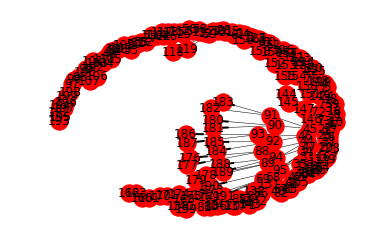

In [29]:
N, p= 100, 0.2
edges = binary_tree(N)
N = 2*N
G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

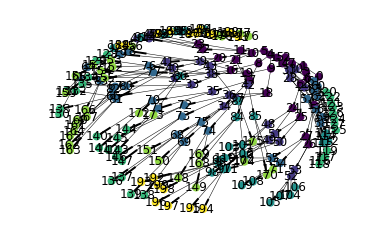

In [30]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

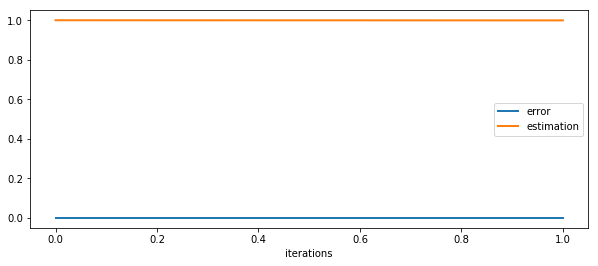

In [31]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
#print (errors)
#print (pr_trace.shape)
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
epsilon = np.min(create_page_rank_markov_chain(edges))
plt.plot(x, np.array([(1.-epsilon)**n for n in range(len(x))]), 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

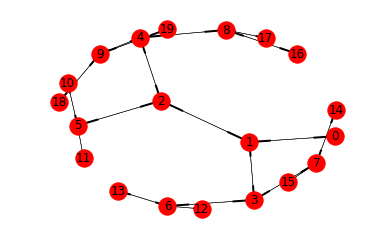

In [32]:
N, p= 10, 0.2
edges = binary_tree2(N)
N = 2*N
G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

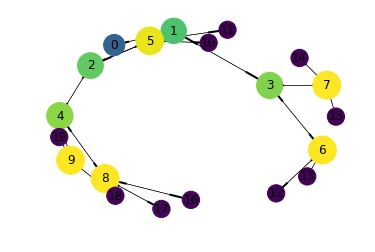

In [33]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

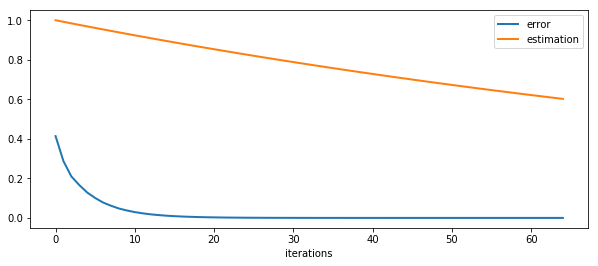

In [34]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
#print (errors)
#print (pr_trace.shape)
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
epsilon = np.min(create_page_rank_markov_chain(edges))
plt.plot(x, np.array([(1.-epsilon)**n for n in range(len(x))]), 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

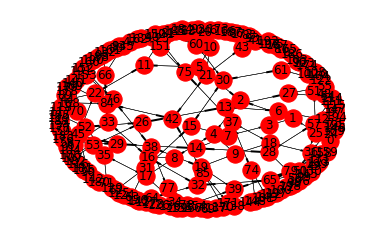

In [35]:
N, p= 100, 0.2
edges = binary_tree2(N)
N = 2*N
G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.5)

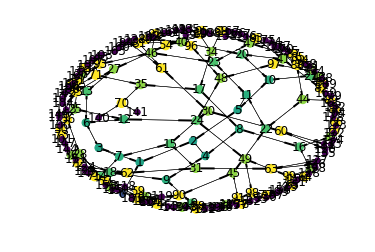

In [36]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.5, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

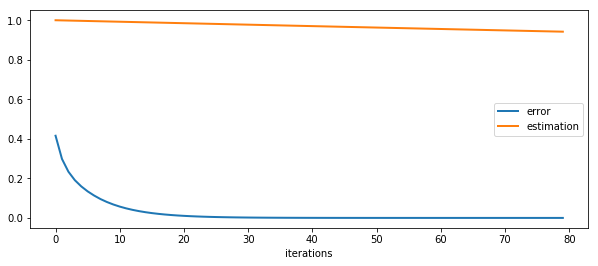

In [37]:
pr_distribution, pr_trace = page_rank(edges, start_distribution, 
                                      return_trace=True)
errors = np.abs(pr_trace - pr_trace[-1]).sum(axis=(1, 2))
#print (errors)
#print (pr_trace.shape)
plt.figure(figsize=(10, 4))
x = np.arange(len(errors))
plt.plot(x, errors, lw=2, label='error')
epsilon = np.min(create_page_rank_markov_chain(edges))
plt.plot(x, np.array([(1.-epsilon)**n for n in range(len(x))]), 
         lw=2, label='estimation')
plt.legend()
plt.xlabel('iterations')
plt.show()

Видим, что у двоичных деревьев, если рёбра только от корня к сыновьям, сходимость очень быстрая, так как у половины вершин одинаковый вес, рёбер очень мало.
Если рёбра направлены в 2 стороны, то вершинами с наибольшим весам будут те, которые находятся на среднем уровне дерева, так как они нименее удалены от "краёв" дерева (корня и сыновей).

# Part 2 (15%)

В этой части вам предстоит построить реальный веб-граф и посчитать его PageRank. Ниже определены вспомогательные функции.

In [39]:
def load_links(url, sleep_time=1, attempts=3, timeout=20):
    ''' Загружает страницу по ссылке url и выдает список ссылок, 
    на которые ссылается данная страница.
        url --- string, адрес страницы в интернете;
        sleep_time --- задержка перед загрузкой страницы;
        timeout --- время ожидания загрузки страницы;
        attempts --- число попыток загрузки страницы. 
        Попытка считается неудачной, если выбрасывается исключение.
    
        В случае, если за attempts попыток не удалось загрузить страницу,
        то последнее исключение пробрасывается дальше.
    '''
    
    sleep(sleep_time)
    parsed_url = urlparse(url)
    links = []

    # Попытки загрузить страницу
    for i in range(attempts):
        try:
            # Ловить исключения только из urlopen может быть недостаточно. 
            # Он может выдавать какой-то бред вместо исключения, 
            # из-за которого исключение сгенерирует BeautifulSoup
            soup = BeautifulSoup(urlopen(url, timeout=timeout), 'lxml')
            break
            
        except Exception as e:
            #print(e)
            if i == attempts - 1:
                raise e

    for tag_a in soup('a'):  # Посмотр всех ссылочных тегов
        if 'href' in tag_a.attrs:
            link = list(urlparse(tag_a['href']))
            
            # Если ссылка является относительной,
            # то ее нужно перевести в абсолютную
            if link[0] == '': link[0] = parsed_url.scheme
            if link[1] == '': link[1] = parsed_url.netloc
            
            links.append(urlunparse(link))
            
    return links


def get_site(url):
    ''' По ссылке url возвращает адрес сайта. '''
    
    return urlparse(url).netloc

Код ниже загружает $N$ веб-страниц, начиная с некоторой стартовой страницы и переходя по ссылкам. Загрузка происходит методом обхода в ширину. Все собранные урлы страниц хранятся в urls. В links хранится список ссылок с одной страницы на другую. Особенность кода такова, что в urls хранятся все встреченные урлы, которых может быть сильно больше $N$. Аналогично, в links ребра могут ссылаться на страницы с номером больше $N$. Однако, все ребра из links начинаются только в первых $N$ страницах. Таким образом, для построения веб-графа нужно удалить все, что связано с вершинами, которые не входят в первые $N$.

Это очень примерный шаблон, к тому же не оптимальный. Можете вообще его не использовать и написать свое.

In [43]:
def build_links():
    
    for i in range(N):
        try:
            # Загружаем страницу по урлу и извлекаем из него все ссылки
            # Не выставляйте sleep_time слишком маленьким, 
            # а то еще забанят где-нибудь
            links_from_url = load_links(urls[i], sleep_time=0.5)
            # print (links_from_url)
            # Если мы хотим переходить по ссылкам только определенного сайта
            links_from_url = list(filter(lambda x: get_site(x) == site, 
                                         links_from_url))

            # Добавляем соответствующие вершины и ребра в веб-граф
            for j in range(len(links_from_url)):
                # Такая ссылка уже есть
                if links_from_url[j] in urls:
                    links.append((i, urls.index(links_from_url[j])))

                # Новая ссылка
                else:
                    links.append((i, len(urls)))
                    urls.append(links_from_url[j])

        except:
            pass  # Не загрузилась с 5 попытки, ну и ладно

Теперь выберите какой-нибудь сайт с небольшим количеством страниц (не более 1000). Таким сайтом может быть, например, сайт <a href=http://yandexdataschool.ru>Школы анализа данных</a>, сайт магазина, больницы. Однако, советуем не выбирать сайты типа kremlin.ru, мало ли что.

Постройте полный веб-граф для этого сайта и визуализируйте его. При отрисовке выставляйте width не более 0.1, иначе получится ужасно некрасиво.

Посчитайте PageRank для этого веб-графа. Визуализируйте данный веб-граф, сделав размер вершин пропорционально весу PageRank (см. пример в части 1). Постройте гистограмму весов. Что можно сказать про скорость сходимости?

Выделите небольшое количество (15-20) страниц с наибольшим весом и изобразите граф, индуцированный на этом множестве вершин. Что это за страницы? Почему именно они имеют большой вес?

Как меняется вес PageRank для страниц в зависимости от начального приближения в случае, если не доводить итерационный процесс вычисления до сходимости? Какие выводы о поведении пользователя отсюда можно сделать?

Я ожидаю, что при нашем исследовании вершинами с большими вероятностями окажутся главные страницы сайтов / главные страницы разделов сайтов, потому что на них есть ссылки на многих страницах (часто это header сайта на каждой странице).

Я решил поисследовать сайт моей школы :)
<br>Он сделан достаточно криво, но это и интереснее, постараемся понять, как он устроен.

In [44]:
urls = ['http://www.76202s043.edusite.ru/']
site = get_site(urls[0])
links = []
N = 30
build_links()

In [47]:
links = list(set(links))
print ("Всего ссылок: ", len(links))
new_links = []
for i in range(len(links)):
    if (links[i][1] < N):
        new_links.append((links[i][0], links[i][1]))
print ("Всего ссылок после удаления лишних: ", len(new_links))

Всего ссылок:  2257
Всего ссылок после удаления лишних:  674


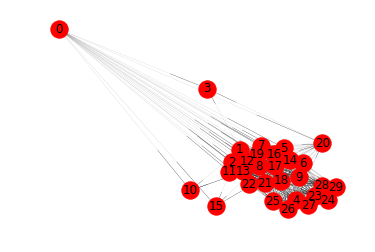

In [48]:
edges = new_links
G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.05)

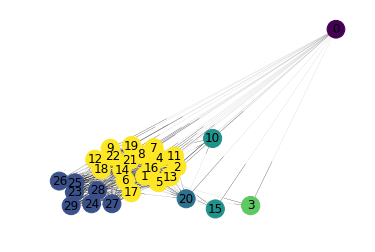

In [49]:
start_distribution = np.ones((1, N)) / N
pr_distribution = page_rank(edges, start_distribution)

size_const = 10 ** 4
plt.axis('off')
networkx.draw_networkx(G, width=0.05, node_size=size_const * pr_distribution, 
                       node_color=pr_distribution)

In [50]:
def make_best_vertices_and_edges(M):
    best_vertices = [(pr_distribution[i], i) for i in range(N)]
    best_vertices = sorted(best_vertices)
    best_vertices = best_vertices[::-1]
    #print (best_vertices)
    result1 = []
    for i in range(M):
        result1.append(best_vertices[i][1])
    result2 = []
    for i in range(len(edges)):
        if (edges[i][0] in result1 and edges[i][1] in result1):
            result2.append(edges[i])
    return list(result1), list(result2)

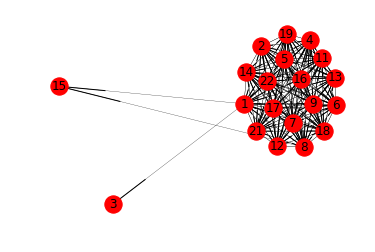

In [51]:
best_vertices, best_edges = make_best_vertices_and_edges(20)
edges = best_edges
G = networkx.DiGraph()
G.add_edges_from(edges)
plt.axis('off')
networkx.draw_networkx(G, width=0.25)

In [52]:
for i in range(20):
    print (urls[best_vertices[i]])

http://www.76202s043.edusite.ru/p127aa1.html
http://www.76202s043.edusite.ru/p134aa1.html
http://www.76202s043.edusite.ru/p163aa1.html
http://www.76202s043.edusite.ru/p162aa1.html
http://www.76202s043.edusite.ru/p157aa1.html
http://www.76202s043.edusite.ru/p37aa1.html
http://www.76202s043.edusite.ru/p116aa1.html
http://www.76202s043.edusite.ru/p53aa1.html
http://www.76202s043.edusite.ru/p145aa1.html
http://www.76202s043.edusite.ru/p112aa1.html
http://www.76202s043.edusite.ru/p155aa1.html
http://www.76202s043.edusite.ru/p142aa1.html
http://www.76202s043.edusite.ru/p146aa1.html
http://www.76202s043.edusite.ru/p18aa1.html
http://www.76202s043.edusite.ru/p38aa1.html
http://www.76202s043.edusite.ru/p118aa1.html
http://www.76202s043.edusite.ru/p136aa1.html
http://www.76202s043.edusite.ru/p1aa1.html
http://www.76202s043.edusite.ru/%3Ca href=»http://xn--80aalcbc2bocdadlpp9nfk.xn--d1acj3b» target=»_blank»%3E%3Cimg class=»alignnone size-medium» src=»http://obr55.ru/wp-content/uploads/2015/12/per

Посмотрим на страницы с наибольшими весами, видим, что это страницы, на которые можно перейти, кликнув на главное меню слева на сайте. Интересный факт, туда не попала 0-ая страница (http://www.76202s043.edusite.ru/), которая является главной страницой сайта. Перейдя на неё, мы понимаем, что так получилось из-за того, что на титульной странице нет главного меню справа, то есть, не со многих страниц сайта мы сможем перейти на главную.

## Part 3 (50%)

Для выполнения этой части вам потребуется библиотека RankLib https://sourceforge.net/p/lemur/wiki/RankLib/

Скачайте датасет с конкурса «Интернет-математика 2009»
https://academy.yandex.ru/events/data_analysis/grant2009/

Разбейте его на три части train, test, valid размера 10% каждая.
Функции, реализующие это, возьмите с семинара.
Правда, привести файл к формату SVM-Rank (см. документацию по RankLib) придется самостоятельно.

Обучите на train методы MART и LambdaMART на 300 итераций, указав им метрику NDCG и передав так же valid.
Записывайте сюда команды аналогично тому, как это было сделано на семинаре.
Значения метрики в зависимости от номера итерации сохранились в log-файле.
Для считывания поможет приведенная ниже функция.

In [54]:
def read_metric_dependence_from_file(file_name, num_lines, num_blocks=1):
    ''' Извлекает значения метрики в процессе обучения из log-файлов, 
    создаваемых библиотекой RankLib при обучении.
        file_name --- имя log-файла
        num_lines --- число строк, в которых записаны значения. 
                      Смысл --- количество выполненых итераций при обучении.
        num_blocks --- количество блоков значений. 
                       Смысл --- число k в случае k-fold CV
                       
        Возвращает лист из np.array в количестве num_blocks.
    Первый столбец каждого np.array --- номер итерации. Все следующие --- значения.
    '''
    
    with open(file_name) as f:
        text = f.readlines()
    
    values = []
    for block_id in range(num_blocks):
        index = text.index('Training starts...\n') + 4
        block_values = np.array(list(map(lambda x: list(map(float, x.split('|')[:-1])), 
                                         text[index:index + num_lines])))
        values.append(block_values)
        text = text[index:]
        
    return values

def read_file(file_path, features_count):
    ''' Считывает дата-файл по адресу file_path, в котором есть не более features_count признаков.
    Возвращает список меток релевантности, id запросов и матрицу признаков'''
    
    relevs = []
    qids = []
    features = []
    
    with open(file_path) as data_file:
        for line in data_file:
            split_line = line.split(' ')
            
            # релевантность и id запроса
            relevs.append(split_line[0])
            qids.append(int(split_line[-1]))
            
            # признаки
            object_features = np.zeros(features_count, dtype=float)
            for feat in split_line[1:-2]:
                index, value = feat.split(':')
                object_features[int(index)] = float(value)
            
            features.append(object_features)
    
    return relevs, qids, np.array(features)


def write(features, relevs, qids, file_path, index_begin, index_end):
    ''' Создает файл по адресу file_path, в который будут записаны релевантности relevs,
    номера запросов qids и признаки features с номера index_begin по index_end. '''
    
    with open(file_path, 'w') as f:
        for index_line in range(index_begin, index_end):
            f.write('{} qid:{}'.format(relevs[index_line], qids[index_line]))
            for i in range(features.shape[1]):
                f.write(' {}:{}'.format(i + 1, features[index_line, i]))
            f.write('\n')
            

def split_to_train_valid_test(relevs, qids, features, 
                              train_path, test_path,
                              train_size, test_size,
                              valid_path=None, valid_size=None):
    ''' Разбивает датасет на две или три части, и записывает их в файлы'''

    num_docs = len(qids)
    i_0 = 0
    
    qids = np.array(qids)
    is_new_query = qids[:-1] != qids[1:]  # True в тех позициях, в которых начинается новый запрос
    new_query_positions = np.arange(num_docs - 1)[is_new_query]  # Позиции, в которых начинается новый запрос

    # Ищем позицию, на которой заканчивается train
    allow_positions = new_query_positions > (train_size * num_docs)
    i_1 = new_query_positions[allow_positions][0] if np.sum(allow_positions) > 0 else num_docs

    # Ищем позицию, на которой заканчивается test
    allow_positions = new_query_positions > ((train_size + test_size) * num_docs)
    i_2 = new_query_positions[allow_positions][0] if np.sum(allow_positions) > 0 else num_docs

    write(features, relevs, qids, train_path, i_0, i_1)
    write(features, relevs, qids, test_path, i_1, i_2)

    if valid_path is not None:
        # Ищем позицию, на которой заканчивается valid
        allow_positions = new_query_positions > ((train_size + test_size + valid_size) * num_docs)
        i_3 = new_query_positions[allow_positions][0] if np.sum(allow_positions) > 0 else num_docs

        write(features, relevs, qids, valid_path, i_2, i_3)

In [55]:
%%time
relevs, qids, features = read_file('./data/imat2009_learning.txt', 250)

In [56]:
split_to_train_valid_test(relevs, qids, features,
                          './data/train.txt', './data/test.txt', 0.1, 0.1, 
                          valid_path='./data/valid.txt', valid_size=0.1)

In [61]:
%%time
! java -jar RankLib.jar -train ./data/train.txt -test ./data/test.txt -validate ./data/valid.txt -ranker 6 -tree 300 -leaf 5 -estop 300 -metric2t NDCG@10 -save LambdaMART_300_5.txt > log_LambdaMART_300_5.txt

CPU times: user 639 ms, sys: 244 ms, total: 882 ms
Wall time: 39.9 s


In [64]:
%%time
! java -jar RankLib.jar -train ./data/train.txt -test ./data/test.txt -validate ./data/valid.txt -ranker 0 -tree 300 -leaf 5 -estop 300 -metric2t NDCG@10 -save MART_300_5.txt > log_MART_300_5.txt

CPU times: user 518 ms, sys: 205 ms, total: 722 ms
Wall time: 35 s


Постройте график значения метрики NDCG в зависимости от номера итерации на train и valid для ранее обученных моделей MART и LambdaMART.

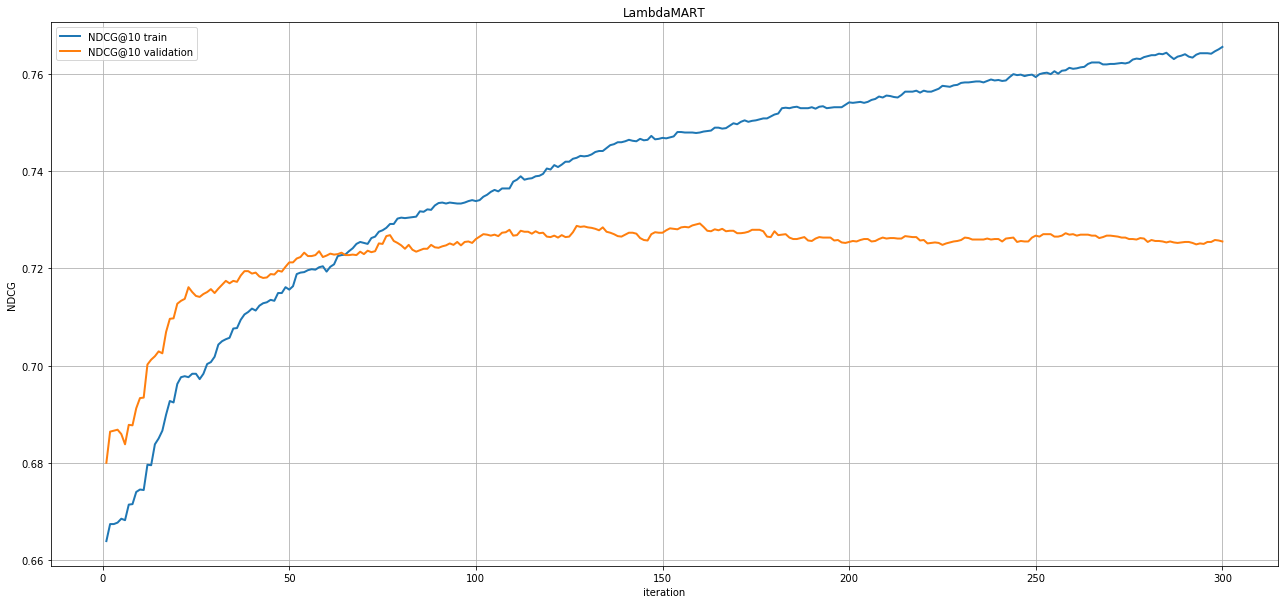

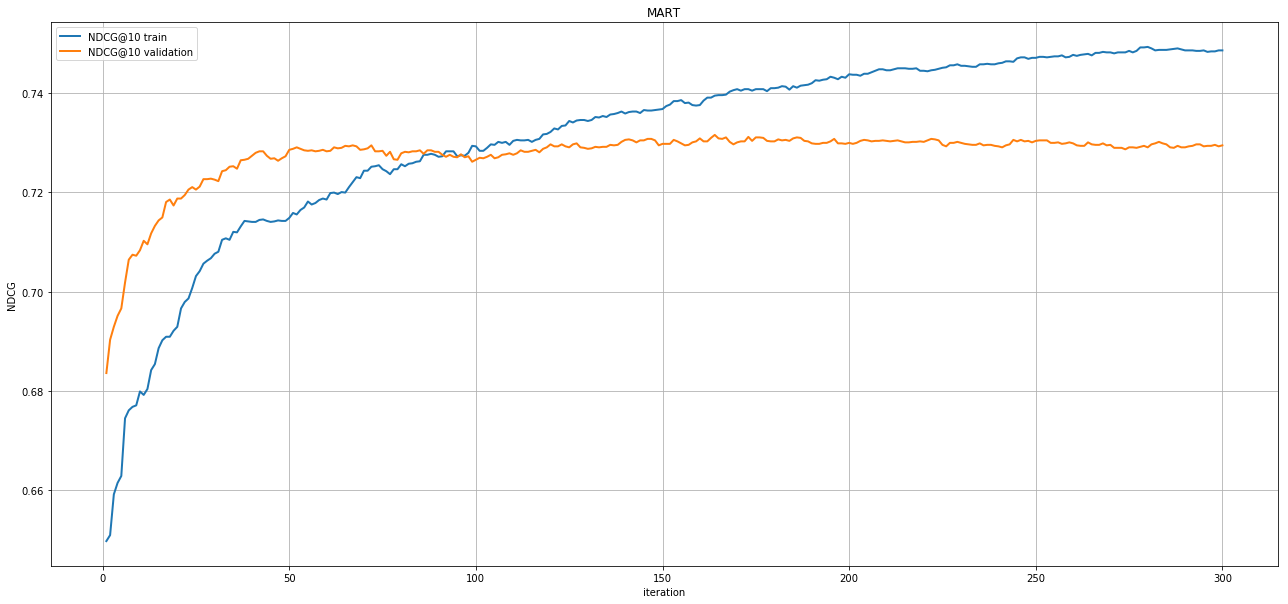

In [67]:
values = read_metric_dependence_from_file('log_LambdaMART_300_5.txt', 300)[0], \
    read_metric_dependence_from_file('log_MART_300_5.txt', 300)[0]

for value, name in zip(values, ['LambdaMART', 'MART']):
    plt.figure(figsize=(22, 10))
    plt.plot(value[:, 0], value[:, 1], lw=2, label='NDCG@10 train')
    plt.plot(value[:, 0], value[:, 2], lw=2, label='NDCG@10 validation')
    plt.xlabel('iteration')
    plt.ylabel('NDCG')
    plt.title(name)
    plt.legend(loc=2)
    plt.grid()
    plt.show()

Можно ли сказать, что какая-то модель работает лучше? Достигается ли точка переобучения?

<Ответ>

Постройте аналогичные графики для Random Forests и RankNet (по отдельности).
Какие выводы можно сделать?

In [ ]:
<...>

#### Сглаживание дискретных метрик

Одна из основных проблем в обучении ранжированию --- дискретность метрик.
Мы знаем, как решается эта проблема в LambdaRank и LambdaMART (см. вопрос выше).
Однако, в некоторых задачах нужно использовать саму метрику.
В связи с этим возникают задачи разработки сглаженных версий дискретных метрик.
Рассмотрим самый простой из них.

Пусть $X_{train}$ --- обучающая выборка. Разобьем ее на две части независимо $M$ раз: $X_{train} = X_1^m \sqcup X_2^m$, причем разбиение будем производить *по запросам*, то есть пары $(q, d_1)$ и $(q, d_2)$ попадают в одну из этих двух частей. Далее обучаем наш метод на $X_1^m$ и применяем к $X_{test}$ --- тестовая выборка. Так мы получим $M$ чисел $Z_1, ..., Z_M$, каждое из которых есть значение метрики. Их усреднение дает сглаженное значение метрики.

Почему такой способ является нечестным? Как нужно было бы действовать честно?

<Ответ>

Теперь вам предстоит построить график сглаженной метрики $NDCG_{10}$ для LambdaMART c 300 деревьями и $M=10$.
Алгоритм примерно следующий:

на каждой итерации
* перемешать $X_{train}$ по запросам. Для этого есть специальная команда, см. описание библиотеки.
* разбить $X_{train}$ на две части. Для этого есть функция с семинара.
* обучить LambdaMART на первой части на 300 деревьях. Валидационную выборку передавать не нужно.
* посчитать значение NDCG на $X_{test}$ по полученной модели в зависимости от количества деревьев.

В последнем пункте имеется ввиду следующее. 
Пусть модель представляется в виде $F(x) = \sum\limits_{t=1}^T \alpha_t f_t(x)$.
Нужно посчитать значение метрики по всем моделям $F(x) = \sum\limits_{t=1}^K \alpha_t f_t(x), K=1, ..., T$.

Для реализации вам потребуется самостоятельно создать файл с такой моделью на основе файла с обученной моделью, который представляет из себя список деревьев с некоторой дополнительной информацией.
Вам нужно в свой файл последовательно добавлять деревья по одному, а затем использовать команду для подсчета значения метрики на тестовой выборке по этой модели, см. описание библиотеки.

Выполнив эти операции, постройте график сглаженной метрики. Сравните с графиком исходной метрики.

Выполнять консольные команды можно в цикле:

In [ ]:
for i in range(5):
    ! echo {np.log(i + 1) ** 2} > file.txt
    with open('file.txt') as f:
        print(f.read())

Если код выше не работает, воспользуйтесь следующей функцией.

In [ ]:
import subprocess

def _run_cmd(cmd, print=False):
    """ Запуск консольной команды cmd """
    
    PIPE = subprocess.PIPE
    p = subprocess.Popen(cmd, shell=True, stdin=PIPE, stdout=PIPE,
                         stderr=subprocess.STDOUT, close_fds=True)
    output = ''
    
    while True:
        s = p.stdout.readline().decode('utf-8')
        if not s: break
        output += str(s)
        if print:
            print(s)
    
    return output